We will gather a list of individuals who played quarterback in college from the years 2000-2015.  (This takes a really long time to run.)  There will have to be some cleanup that will need to take place once the data is gathered.  Once this information is gathered, we will

In [6]:
from sportsipy.ncaaf.teams import Teams, Team
from sportsipy.ncaaf.roster import Player
from datetime import datetime
from sportsipy.ncaaf.boxscore import Boxscores
import pandas as pd
year_list = [str(i) for i in range(2000,2016)]
qb_list = []
for year in year_list:
    for team in Teams(year=year):
        roster = team.roster  # Gets each team's roster
        for player in roster.players:
            try:
                if player.position == 'QB':
                    # print(player.name, year) # I CAN DELETE THIS LINE ONCE I AM READY TO RUN IT FOR THE YEARS 2002-2015
                    qb_list.append([year, player.player_id])
            except TypeError:
                break
dict = {'quarterbacks': qb_list}
qb_df = pd.DataFrame(dict)
# Saving to csv so I will not have to pull all the data again as it takes a very long time. I am using only one year for now to make sure everything works.
qb_df.to_csv('college_quarterbacks2000-2015.csv')


In [7]:
# Going to format the data to get a unique list of quarterbacks.
import re
qb_df['qb_string'] = qb_df['quarterbacks'].astype(str)

qb_df['qb_string'] = qb_df['qb_string'].apply(lambda x: re.findall('\w+-\w+-\d', x))
qb_df['qb_string'] = qb_df['qb_string'].apply("".join)
qb_df.drop_duplicates(subset=['qb_string'], inplace=True)
qb_df = qb_df.reset_index()
qb_df.head(15)


,index,quarterbacks,qb_string
0,0,"[2000, chris-weinke-1]",chris-weinke-1
1,1,"[2000, marcus-outzen-1]",marcus-outzen-1
2,2,"[2000, woodrow-dantzler-1]",woodrow-dantzler-1
3,3,"[2000, willie-simmons-1]",willie-simmons-1
4,4,"[2000, matt-schell-1]",matt-schell-1
5,5,"[2000, george-godsey-1]",george-godsey-1
6,6,"[2000, andy-hall-1]",andy-hall-1
7,7,"[2000, jermaine-crenshaw-1]",jermaine-crenshaw-1
8,8,"[2000, dan-ellis-1]",dan-ellis-1
9,9,"[2000, bryson-spinner-1]",bryson-spinner-1


In [8]:
# Now that we have the unique list of player ID's, we can pull their statistical information.
master_qb_df = pd.DataFrame()

for i in range(len(qb_df)):
    df = Player(qb_df['qb_string'][i]).dataframe
    master_qb_df = master_qb_df.append(df)

master_qb_df.head(20)



,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,fumbles_forced,fumbles_recovered,fumbles_recovered_for_touchdown,games,height,...,total_tackles,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year
1997,5.9,None,7,None,None,None,None,None,3,None,...,None,0,None,None,8,4,None,None,None,
1998,9.1,None,145,None,None,None,None,None,10,None,...,None,1,None,None,-168,-3.6,None,None,None,
1999,7.9,None,232,None,None,None,None,None,11,None,...,None,0,None,None,-109,-3.5,None,None,None,
2000,10.1,None,266,None,None,None,None,None,12,None,...,None,1,None,None,-97,-3.2,None,None,None,SR
Career,9,None,650,None,None,None,None,None,NaN,None,...,None,2,None,None,-366,-3.3,None,None,None,
1997,NaN,None,NaN,None,None,None,None,None,11,None,...,None,0,None,None,8,8,None,None,None,
1998,6.6,None,36,None,None,None,None,None,12,None,...,None,2,None,None,66,1.4,None,None,None,
1999,5.5,None,12,None,None,None,None,None,11,None,...,None,1,None,None,41,2.1,None,None,None,
2000,10.5,None,24,None,None,None,None,None,9,None,...,None,0,None,None,27,1.8,None,None,None,SR
Career,7.5,None,72,None,None,None,None,None,NaN,None,...,None,3,None,None,142,1.7,None,None,None,


In [9]:
# saving to a CSV due to the runtime.
# only want to keep the career stats for each quarterback
master_qb_df = master_qb_df.loc['Career']
master_qb_df.head(15)
master_qb_df.to_csv('master_qb_df.csv') 

Now to see if we can pull NFL QB Statistics.

In [10]:
'''from sportsipy.nfl.teams import Teams, Team
from sportsipy.nfl.roster import Player

brees = Player('BreeDr00')

brees_df = brees.dataframe
brees_df['position']'''

"from sportsipy.nfl.teams import Teams, Team\nfrom sportsipy.nfl.roster import Player\n\nbrees = Player('BreeDr00')\n\nbrees_df = brees.dataframe\nbrees_df['position']"

In [21]:
from sportsipy.nfl.teams import Teams, Team
from sportsipy.nfl.roster import Player, Roster
import pandas as pd
year_list = [str(i) for i in range(2000,2021)]
nfl_qb_list = []
for year in year_list:
    for team in Teams(year=year):
        roster = team.roster  # Gets each team's roster
        for player in roster.players:
            try:
                if player.position == 'QB':
                    print(player.name, year) # I CAN DELETE THIS LINE ONCE I AM READY TO RUN IT FOR THE YEARS 2002-2015
                    nfl_qb_list.append([year, player.name])
            except TypeError:
                break
dict = {'quarterbacks': nfl_qb_list}
nfl_qb_df = pd.DataFrame(dict)
# Saving to csv so I will not have to pull all the data again as it takes a very long time. I am using only one year for now to make sure everything works.
nfl_qb_df.to_csv('nfl_quarterbacks2000-2015.csv')


In [12]:
# Load a spreadsheet of players who have thrown a pass in the NFL between 2000 and 2020.  The goal is to get down to a quarterback list.

nfl_pass_df = pd.read_excel('NFL_QBS_2000-2015.xlsx', sheet_name='OriginalData')
print(nfl_pass_df.shape)
nfl_pass_df = nfl_pass_df[nfl_pass_df['Pos'] != 'wr']
print(nfl_pass_df.shape)
nfl_pass_df = nfl_pass_df[(nfl_pass_df['Pos'] == 'QB') | (nfl_pass_df['Pos'] == '/qb') | (nfl_pass_df['Pos'].isnull()) | (nfl_pass_df['Pos'] == 'qb')]
nfl_pass_df = nfl_pass_df[nfl_pass_df['QBrec'].notnull()]
nfl_pass_df.shape

(2121, 32)
(2088, 32)


(1160, 32)

In [13]:
# Get a list of players who made the Pro-Bowl (one of the measures of success)
from string import punctuation
def probowl(qb_name):
    if '*' in qb_name:
        return True
    else:
        return False
nfl_pass_df['ProBowl'] = nfl_pass_df['Player'].apply(probowl)

nfl_pro_bowl_qb = nfl_pass_df[nfl_pass_df['ProBowl'] == True]

nfl_pro_bowl_qb = nfl_pro_bowl_qb['Player'].to_list()
print(len(nfl_pro_bowl_qb))
nfl_pro_bowl_qb = [x.replace("+", "") for x in nfl_pro_bowl_qb]
nfl_pro_bowl_qb = [x.replace("*", "") for x in nfl_pro_bowl_qb]
nfl_pro_bowl_qb = list(set(nfl_pro_bowl_qb))

nfl_pro_bowl_qb

180


['Donovan McNabb',
 'Andrew Luck',
 'Jared Goff',
 'Peyton Manning',
 'Kirk Cousins',
 'Matt Cassel',
 'Russell Wilson',
 'Kurt Warner',
 'Cam Newton',
 'Dak Prescott',
 'Matt Ryan',
 'Alex Smith',
 'Jake Plummer',
 'Daunte Culpepper',
 'Drew Brees',
 'Deshaun Watson',
 'Trent Green',
 'Teddy Bridgewater',
 'Ben Roethlisberger',
 'David Garrard',
 'Derek Anderson',
 'Robert Griffin III',
 'Philip Rivers',
 'Carson Wentz',
 'Mitchell Trubisky',
 'Rich Gannon',
 'Patrick Mahomes',
 'Tom Brady',
 'Kordell Stewart',
 'Carson Palmer',
 'Steve McNair',
 'Elvis Grbac',
 'Kerry Collins',
 'Eli Manning',
 'Marc Bulger',
 'Brad Johnson',
 'Brett Favre',
 'Josh Allen',
 'Kyler Murray',
 'Jake Delhomme',
 'Drew Bledsoe',
 'Aaron Rodgers',
 'Tony Romo',
 'Jameis Winston',
 'Nick Foles\xa0',
 'Jay Cutler',
 'Jeff Garcia',
 'Andy Dalton',
 'Vince Young',
 'Matthew Stafford',
 'Michael Vick',
 'Tyrod Taylor',
 'Ryan Tannehill',
 'Brian Griese',
 'Matt Schaub',
 'Matt Hasselbeck',
 'Lamar Jackson',
 'D

In [14]:
# Need a unique list of qb's in the nfl_pass_df, and need to create their player ID's.

nfl_pass_df['Player'] = nfl_pass_df['Player'].apply(lambda x: x.replace('*',''))
nfl_pass_df['Player'] = nfl_pass_df['Player'].apply(lambda x: x.replace('+',''))
# print(nfl_pass_df.shape)
nfl_pass_df = nfl_pass_df.drop_duplicates(subset='Player', keep='first')
# nfl_pass_df.shape

def create_player_id(player_string):
    combined  = player_string.split(' ')
    return combined[1][:4] + combined[0][:2] + '00'

nfl_pass_df['player_id'] = nfl_pass_df['Player'].apply(create_player_id)
nfl_pass_df['player_id']


297     SiemTr00
360     PeetRo00
401     CoviSc00
451     PennCh00
469     FryeCh00
          ...   
1736    CarrDe00
1763    MayfBa00
1776    RivePh00
1825    MurrKy00
2015    HerbJu00
Name: player_id, Length: 270, dtype: object

In [15]:
# master NFL QB dataframe listing

master_nfl_qb_df = pd.DataFrame()
nfl_pass_df = nfl_pass_df.reset_index()


for i in range(len(nfl_pass_df)):
    df = Player(nfl_pass_df['player_id'][i]).dataframe
    try:
        df['Player'] = nfl_pass_df['Player'][i]
        print(df['Player'])
    except TypeError:
        continue
    master_nfl_qb_df = master_nfl_qb_df.append(df)
master_nfl_qb_df.to_csv('master_nfl_qb_df.csv')

2015      Trevor Siemian
2016      Trevor Siemian
2017      Trevor Siemian
2019      Trevor Siemian
Career    Trevor Siemian
Name: Player, dtype: object
1989      Rodney Peete
1990      Rodney Peete
1991      Rodney Peete
1992      Rodney Peete
1993      Rodney Peete
1994      Rodney Peete
1995      Rodney Peete
1996      Rodney Peete
1997      Rodney Peete
1998      Rodney Peete
1999      Rodney Peete
2001      Rodney Peete
2002      Rodney Peete
2003      Rodney Peete
2004      Rodney Peete
Career    Rodney Peete
Name: Player, dtype: object
1999      Scott Covington
2002      Scott Covington
Career    Scott Covington
Name: Player, dtype: object
1994      Chad Pennington
1995      Chad Pennington
1996      Chad Pennington
1997      Chad Pennington
1998      Chad Pennington
1999      Chad Pennington
Career    Chad Pennington
Name: Player, dtype: object
2005      Charlie Frye
2006      Charlie Frye
2007      Charlie Frye
2008      Charlie Frye
2009      Charlie Frye
Career    Charlie Fr

In [16]:
master_nfl_qb_df['Player'].value_counts()

Tom Brady           23
Vinny Testaverde    22
Drew Brees          21
Brett Favre         21
Rich Gannon         19
                    ..
Max Hall             2
Josh Allen           2
Jeff Tuel            2
Brett Rypien         2
Will Grier           2
Name: Player, Length: 265, dtype: int64

In [17]:
# filter the master nfl_qb dataframe to those players that have values counts 6 and above (5 years, plus their career stat line).
master_nfl_qb_df =  master_nfl_qb_df.groupby('Player').filter(lambda x: len(x) > 5)
print(master_nfl_qb_df.shape)
master_nfl_qb_df['Player'].value_counts()

(1850, 127)


Tom Brady           23
Vinny Testaverde    22
Brett Favre         21
Drew Brees          21
Kerry Collins       19
                    ..
Jimmy Clausen        6
Scott Tolzien        6
Ken Dorsey           6
Josh McCown          6
Daniel Jones         6
Name: Player, Length: 174, dtype: int64

In [18]:
# create a column of years played for each quarterback, and then filter on their career stats
master_nfl_qb_df['years_played'] = master_nfl_qb_df.groupby(['Player'])['Player'].transform('count') - 1
master_nfl_qb_df = master_nfl_qb_df.loc['Career']

print(master_nfl_qb_df.head(15))
master_nfl_qb_df.to_csv('master_nfl_qb_df_filter.csv')

       adjusted_net_yards_per_attempt_index  \
Career                                  NaN   
Career                                 None   
Career                                  NaN   
Career                                  NaN   
Career                                 None   
Career                                 None   
Career                                  NaN   
Career                                  NaN   
Career                                  NaN   
Career                                  NaN   
Career                                  NaN   
Career                                 None   
Career                                  NaN   
Career                                  NaN   
Career                                  NaN   

       adjusted_net_yards_per_pass_attempt adjusted_yards_per_attempt  \
Career                                4.77                        5.8   
Career                                None                       None   
Career                      

In [32]:
# going to separate the successful college quarterbacks from the non-successful quarterbacks (compare the name list of the nfl dataframe versus the master qb dataframe)

master_qb_df = pd.read_csv('master_qb_df.csv')
master_qb_df['name'].isin(master_nfl_qb_df['Player']).value_counts()

False    2042
True       95
Name: name, dtype: int64

In [33]:
# For the master_qb_df, we are going to add a column 'NFL_5' that shows if the quarterback played 5 years in the NFL or not.
master_qb_df = master_qb_df.assign(NFL_5=master_qb_df.name.isin(master_nfl_qb_df.Player).astype(int))

In [34]:
master_qb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            2137 non-null   object 
 1   adjusted_yards_per_attempt            1976 non-null   float64
 2   assists_on_tackles                    803 non-null    float64
 3   completed_passes                      1976 non-null   float64
 4   extra_points_made                     517 non-null    float64
 5   field_goals_made                      515 non-null    float64
 6   fumbles_forced                        473 non-null    float64
 7   fumbles_recovered                     482 non-null    float64
 8   fumbles_recovered_for_touchdown       67 non-null     float64
 9   games                                 0 non-null      float64
 10  height                                719 non-null    object 
 11  interceptions    

In [35]:
# Let's get rid of some columns that are not neccesary to determining a qb's success
drop_columns = ['assists_on_tackles', 'extra_points_made', 'field_goals_made', 'fumbles_forced', 'fumbles_recovered_for_touchdown',
                'games', 'interceptions', 'interceptions_returned_for_touchdown', 'kickoff_return_touchdowns', 'other_touchdowns',
                'passes_defended', 'punt_return_touchdowns', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss',
                'total_tackles', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception',
                'year']

master_qb_df = master_qb_df.drop(drop_columns, axis=1)
master_qb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2137 non-null   object 
 1   adjusted_yards_per_attempt        1976 non-null   float64
 2   completed_passes                  1976 non-null   float64
 3   fumbles_recovered                 482 non-null    float64
 4   height                            719 non-null    object 
 5   interceptions_thrown              1976 non-null   float64
 6   name                              2137 non-null   object 
 7   pass_attempts                     1976 non-null   float64
 8   passing_completion                1976 non-null   float64
 9   passing_touchdowns                1976 non-null   float64
 10  passing_yards                     1976 non-null   float64
 11  passing_yards_per_attempt         1976 non-null   float64
 12  player

In [44]:
# Let's get the subset of qb's that made it to the NFL 5 years and look at some preliminary statistics from their college years.

success_qb_df = master_qb_df[master_qb_df['NFL_5'] == 1]
a_list = sorted(list(success_qb_df['name']))
a_list

['A.J. Feeley',
 'A.J. McCarron',
 'Aaron Rodgers',
 'Andrew Luck',
 'Andy Dalton',
 'Ben Roethlisberger',
 'Blaine Gabbert',
 'Blake Bortles',
 'Brandon Weeden',
 'Brian Hoyer',
 'Brock Osweiler',
 'Brodie Croyle',
 'Brooks Bollinger',
 'Bruce Gradkowski',
 'Bryce Petty',
 'Byron Leftwich',
 'Cam Newton',
 'Carson Palmer',
 'Case Keenum',
 'Chad Henne',
 'Charlie Frye',
 'Charlie Whitehurst',
 'Chase Daniel',
 'Chris Simms',
 'Chris Weinke',
 'Colin Kaepernick',
 'Colt McCoy',
 'Dak Prescott',
 'Dan Orlovsky',
 'David Carr',
 'David Garrard',
 'Derek Anderson',
 'Derek Carr',
 'Drew Brees',
 'Drew Stanton',
 'Eli Manning',
 'Garrett Gilbert',
 'Geno Smith',
 'J.P. Losman',
 'Jacoby Brissett',
 'Jameis Winston',
 'Jared Goff',
 'Jason Campbell',
 'Jay Cutler',
 'Jimmy Clausen',
 'Joe Burrow',
 'Joe Flacco',
 'Joe Webb',
 'Joey Harrington',
 'Josh Freeman',
 'Josh McCown',
 'Josh Rosen',
 'Kellen Clemens',
 'Ken Dorsey',
 'Kevin Kolb',
 'Kirk Cousins',
 'Kyle Boller',
 'Kyle Orton',
 'L

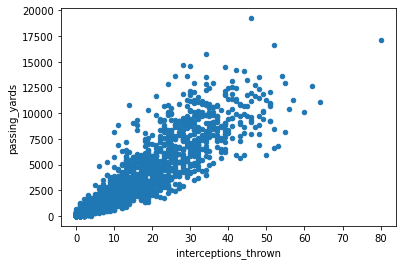

In [45]:
# Some plots

master_qb_df.plot.scatter('interceptions_thrown','passing_yards')

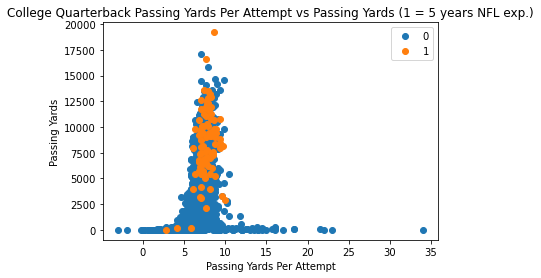

In [61]:
import matplotlib.pyplot as plt
groups = master_qb_df.groupby('NFL_5')
for name, group in groups:
    plt.plot(group['passing_yards_per_attempt'], group['passing_yards'], marker='o', linestyle='', label=name)

plt.xlabel('Passing Yards Per Attempt')
plt.ylabel('Passing Yards')
plt.title('College Quarterback Passing Yards Per Attempt vs Passing Yards (1 = 5 years NFL exp.)')
plt.legend()
plt.savefig('ypa_vs_yd.png')

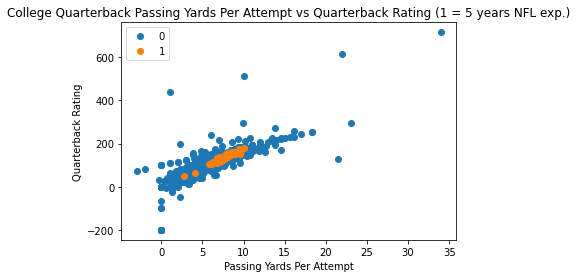

In [62]:
import matplotlib.pyplot as plt
groups = master_qb_df.groupby('NFL_5')
for name, group in groups:
    plt.plot(group['passing_yards_per_attempt'], group['quarterback_rating'], marker='o', linestyle='', label=name)
plt.xlabel('Passing Yards Per Attempt')
plt.ylabel('Quarterback Rating')
plt.title('College Quarterback Passing Yards Per Attempt vs Quarterback Rating (1 = 5 years NFL exp.)')
plt.legend()
plt.savefig('ypa_vs_qbr.png')

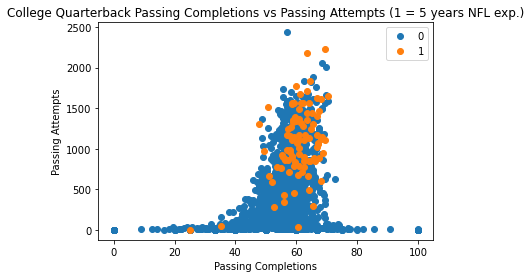

In [63]:
import matplotlib.pyplot as plt
groups = master_qb_df.groupby('NFL_5')
for name, group in groups:
    plt.plot(group['passing_completion'], group['pass_attempts'], marker='o', linestyle='', label=name)
plt.xlabel('Passing Completions')
plt.ylabel('Passing Attempts')
plt.title('College Quarterback Passing Completions vs Passing Attempts (1 = 5 years NFL exp.)')
plt.legend()
plt.savefig('comp_vs_att.png')


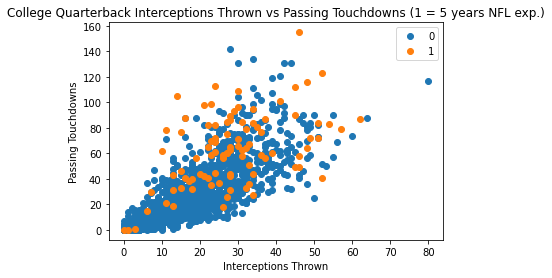

In [64]:
import matplotlib.pyplot as plt
groups = master_qb_df.groupby('NFL_5')
for name, group in groups:
    plt.plot(group['interceptions_thrown'], group['passing_touchdowns'], marker='o', linestyle='', label=name)
plt.xlabel('Interceptions Thrown')
plt.ylabel('Passing Touchdowns')
plt.title('College Quarterback Interceptions Thrown vs Passing Touchdowns (1 = 5 years NFL exp.)')
plt.legend()
plt.savefig('int_vs_td.png')